# Guía 2: aproximación de funciones

## Problema 1

• **Script:** Escriba un breve script en Octave que reproduzca la gráfica de la Figura 2 del apunte
(tema 2), en el intervalo [−0.9, 0.9]

In [1]:
# vamos a estar usando esta función que es lo mismo que polyval de octave
function pnz = polinom(c,x) 
    # pnz - evalua polinomio con multiplicacion anidada
    n = length(c);
    pnz = zeros(1,length(x));
    for k=1:n
        pnz = c(k) + pnz.*x;
    end
end

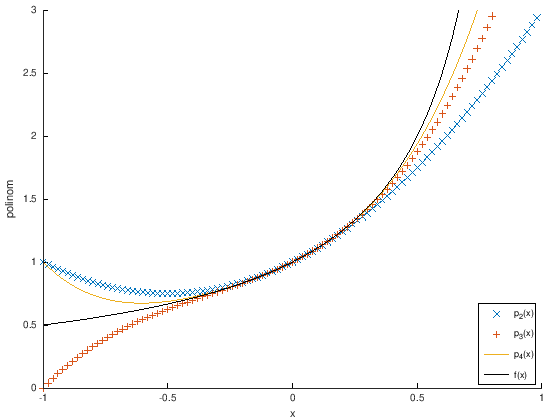

In [18]:
x =-1:0.02:.99;
simb = ["x", "+", "--"];
hold on
for c=3:5
    p = polinom(ones(1,c),x);
    plot(x, p, simb(c-2));
end
plot(x,(1./(1-x)),"k")
legend("p_2(x)","p_3(x)","p_4(x)", "f(x)", "location", "southeast")
xlabel("x")
ylabel("polinom")
axis([-1,1,0,3])

## Problema 2

Resuelva los siguientes casos, y efectue, si es posible, la expansión de Taylor correspondiente de alguna de las funciones dadas de manera de simplificar las expresiones:

**1)** $$f(x) = \frac{e^x - 1}{x}$$

Sabemos que 

$$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...$$

Restando 1 nos queda:

$$e^x -1 = x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} +...$$

Y diviendo por x:

$$\frac{e^x -1}{x} = 1 + \frac{x}{2!} + \frac{x^2}{3!} + \frac{x^3}{4!} +...$$

Ahora graficamos la aproximación usando la nuestra querida función `polinom`:

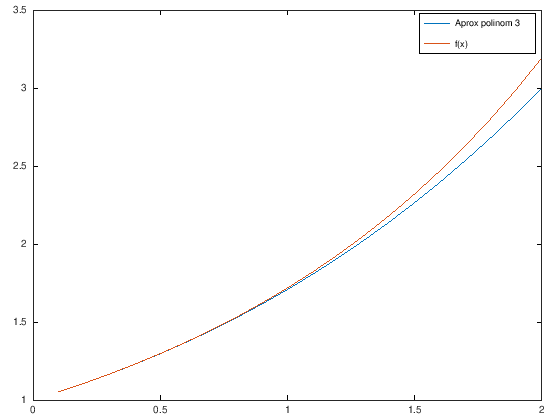

In [2]:
# coeficientes
c = [1/24, 1/6, 1/2, 1];

# dominio
x = 0.1:0.1:2;

# polinomio de aproximacion
p3 = polinom(c,x);

# funcion octave
f = (exp(x)-1)./x;

plot(x, p3, x, f)
legend("Aprox polinom 3", "f(x)")

**2)** $$f(x) = \frac{sin(x)}{x}$$

Sabemos que:

$$sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} + ...$$

por lo tanto al dividirlo por *x* nos queda

$$\frac{sin(x)}{x} = 1 - \frac{x^2}{3!} + \frac{x^4}{5!} - \frac{x^6}{7!}+...$$

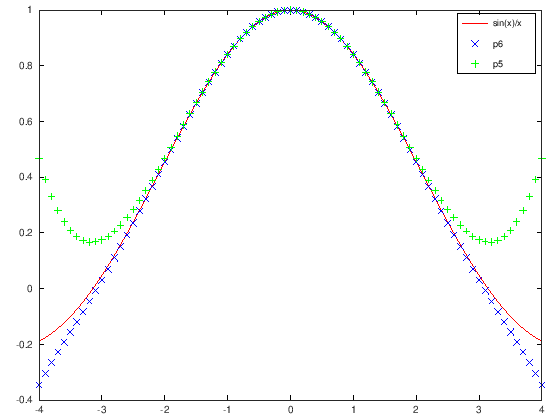

In [47]:
# coeficientes de los polinomios
c6 = [-1/5040, 0, 1/120, 0, -1/6, 0, 1];
c5 = c6(2:length(c6));
x = -4:0.1:4;

p6 = polinom(c6, x);
p5 = polinom(c5, x);

plot(x, sin(x)./x,"r", x, p6,"xb", x, p5, "+g")
legend("sin(x)/x", "p6", "p5")

**3)** $$I(a) = \int_0^a \frac{sin(x)}{x} dx$$

Primero integramos la expansión que calculamos en el ejercicio previo:


$$\int_0^a \frac{sin(x)}{x} dx = \int_0^a 1 - \frac{x^2}{3!} + \frac{x^4}{5!} - \frac{x^6}{7!} + ... dx$$

$$ = x - \frac{x^3}{3*3!} + \frac{x^5}{5*5!} - \frac{x^7}{7*7!} + ... \bigg]_0^a$$

Reacomodamos, 

$$ p_7(a)= - \frac{a^7}{35280} + 0a^6 + \frac{a^5}{600} + 0a^4 - \frac{a^3}{18} + 0a^2 + a + 0$$

In [49]:
a = 0.7;
c7 = [-1/35280, 0, 1/600, 0, 1/18, 0, 1, 0];
p7 = polinom(c7, a)
err= abs(p7 - sqrt(pi)*erf(a)/2)

p7 =  0.71933
err =  0.11865


### Problema 2.6

In [45]:
function erff = err_fcn(a,x)
    n = length(x);
    erff = [];
    for k=1:n
        fac= 1.;
        z = x(k);
        if(z < 0.) 
            z = -z;
            fac= -1.0;
        endif
        t = 1./(1. + 0.47047*z);
        erff(k) = fac*(1.-t*(a(1) + t*(a(2)+a(3)*t))*exp(-z*z));
    end
end

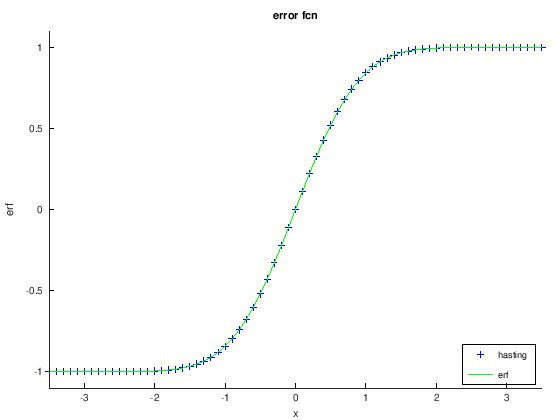

In [46]:
# evaluamos erf con Hasting
a(1)=  0.3480242; a(2)= -0.0958798; a(3)= 0.7478556; % Coeff Hasting

xa= -3.5; xb= 3.5;
x = xa:1/10:xb;

e1 = err_fcn(a,x);
e2 = erf(x);
    
%  plots
hold on
plot(x,e1,'+b',"linewidth",1.5);
plot(x,e2,'g',"linewidth",1.5);
axis([xa xb -1.1 1.1])
title('error fcn'); 
xlabel('x');
ylabel('erf');
legend('hasting','erf','location','southeast')  